<a href="https://colab.research.google.com/github/RishiRishwanth/Natural_Language_Processing/blob/main/Spam_Messege_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#dataPreprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
#model shoudl do the binary classification i.e. ham or spam

df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
df['label'].value_counts() #imbalanced data

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
#DataExploration and processing

ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

print(ham.shape)
print(spam.shape)

(4825, 4)
(747, 4)


In [8]:
ham = ham.sample(spam.shape[0])

In [9]:

print(ham.shape)
print(spam.shape)

(747, 4)
(747, 4)


In [10]:
data = ham.append(spam, ignore_index=True)
data.shape

<ipython-input-10-0c7601f6ab30>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


(1494, 4)

In [18]:
data.head()

,label,message,length,punct
0,ham,If you're not in my car in an hour and a half ...,63,2
1,ham,Early bird! Any purchases yet?,30,2
2,ham,I plane to give on this month end.,34,1
3,ham,Ok. No wahala. Just remember that a friend in ...,54,5
4,ham,"swhrt how u dey,hope ur ok, tot about u 2day.l...",67,5


In [11]:
data.head()

,label,message,length,punct
0,ham,If you're not in my car in an hour and a half ...,63,2
1,ham,Early bird! Any purchases yet?,30,2
2,ham,I plane to give on this month end.,34,1
3,ham,Ok. No wahala. Just remember that a friend in ...,54,5
4,ham,"swhrt how u dey,hope ur ok, tot about u 2day.l...",67,5


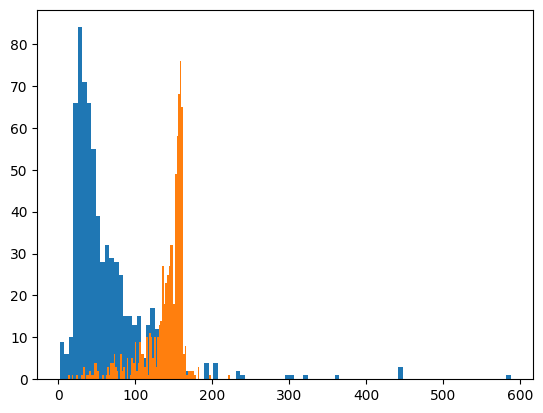

In [15]:
plt.hist(data[data['label']=='ham']['length'],bins = 100)
plt.hist(data[data['label']=='spam']['length'],bins = 100)

plt.show()

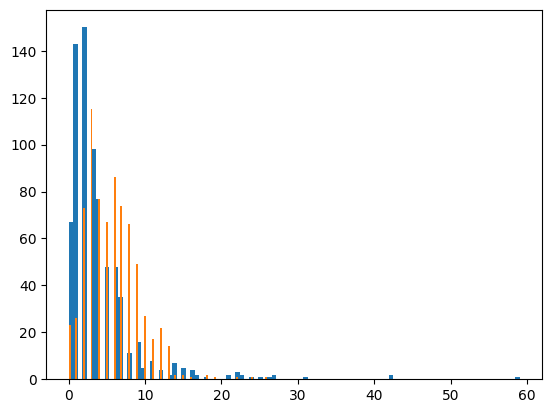

In [16]:
plt.hist(data[data['label']=='ham']['punct'],bins = 100)
plt.hist(data[data['label']=='spam']['punct'],bins = 100)

plt.show()

In [20]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['message'], data['label'], test_size = 0.3,random_state=0, shuffle = True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1045,)
(449,)
(1045,)
(449,)


In [48]:
#random forest classifer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

classifier = Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators = 10))])

In [49]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [50]:
#prediction

y_pred = classifier.predict(x_test)
y_test,y_pred
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy_score(y_test,y_pred)

0.9443207126948775

In [51]:
confusion_matrix(y_test,y_pred)

array([[222,   5],
       [ 20, 202]])

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [53]:
from sklearn.svm import SVC

svm = Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C=100, gamma = 'auto'))])
svm

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [54]:
svm.fit(x_train,y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [55]:
y_pred = svm.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred)

0.9376391982182628

In [57]:
confusion_matrix(y_test,y_pred)

array([[217,  10],
       [ 18, 204]])

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.96      0.94       227
        spam       0.95      0.92      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [61]:
#predicting testing data

test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [62]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
